In [60]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [61]:
!pip install pycaret

In [139]:
import pycaret
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from pycaret.classification import *

In [63]:
df = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Exploratory Data Analysis

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


9 features are availiable in the date set. Further, There is no null value is present and Data types are also shown.

In [65]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Statistical Analysis are shown for statistical understanding of data set 

lets find out unique value in the features to idientify the qualitative variables

In [66]:
def unique(data,column):
    unique_values = len(data[column].unique())
    value_count = data[column].value_counts()
    print(f"Column {column} has {unique_values} Unique values \n")
    print(value_count)

This function will help us to idientify the qualitative variables in the data set

In [67]:
unique(df,'Pregnancies')

Column Pregnancies has 17 Unique values 

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64


Pregnancies shows Number of times pregnant in which 17 unique values are found.

In [68]:
unique(df,'Glucose')

Column Glucose has 136 Unique values 

99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: Glucose, Length: 136, dtype: int64


In [69]:
unique(df,'BloodPressure')

Column BloodPressure has 47 Unique values 

70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      1
24      1
38      1
40      1
114     1
Name: BloodPressure, dtype: int64


In [70]:
unique(df,'SkinThickness')

Column SkinThickness has 51 Unique values 

0     227
32     31
30     27
27     23
23     22
33     20
28     20
18     20
31     19
19     18
39     18
29     17
40     16
25     16
26     16
22     16
37     16
41     15
35     15
36     14
15     14
17     14
20     13
24     12
42     11
13     11
21     10
46      8
34      8
12      7
38      7
11      6
43      6
16      6
45      6
14      6
44      5
10      5
48      4
47      4
49      3
50      3
8       2
7       2
52      2
54      2
63      1
60      1
56      1
51      1
99      1
Name: SkinThickness, dtype: int64


In [71]:
unique(df,'Insulin')

Column Insulin has 186 Unique values 

0      374
105     11
130      9
140      9
120      8
      ... 
73       1
171      1
255      1
52       1
112      1
Name: Insulin, Length: 186, dtype: int64


In [72]:
unique(df,'BMI')

Column BMI has 248 Unique values 

32.0    13
31.6    12
31.2    12
0.0     11
32.4    10
        ..
36.7     1
41.8     1
42.6     1
42.8     1
46.3     1
Name: BMI, Length: 248, dtype: int64


In [73]:
unique(df,'DiabetesPedigreeFunction')

Column DiabetesPedigreeFunction has 517 Unique values 

0.258    6
0.254    6
0.268    5
0.207    5
0.261    5
        ..
1.353    1
0.655    1
0.092    1
0.926    1
0.171    1
Name: DiabetesPedigreeFunction, Length: 517, dtype: int64


In [74]:
unique(df,'Age')

Column Age has 52 Unique values 

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
38    16
36    16
32    16
45    15
34    14
46    13
43    13
40    13
39    12
35    10
50     8
51     8
52     8
44     8
58     7
47     6
54     6
49     5
48     5
57     5
53     5
60     5
66     4
63     4
62     4
55     4
67     3
56     3
59     3
65     3
69     2
61     2
72     1
81     1
64     1
70     1
68     1
Name: Age, dtype: int64


# Data Visualization

Now lets see the Distribution of Data

In [76]:
def cont_dist(data: pd.DataFrame= None, column: str= None , height: int = 5):
    sns.displot(data, x= column, kde=True,height=height).set(title=f'Distribution of {column}')

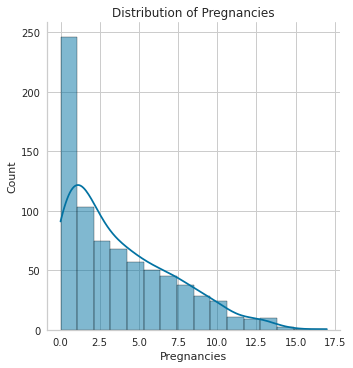

In [77]:
cont_dist(df,'Pregnancies')

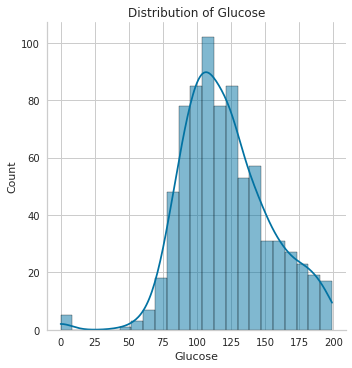

In [85]:
cont_dist(df,'Glucose')

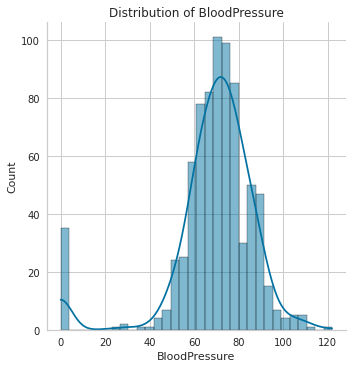

In [86]:
cont_dist(df,'BloodPressure')

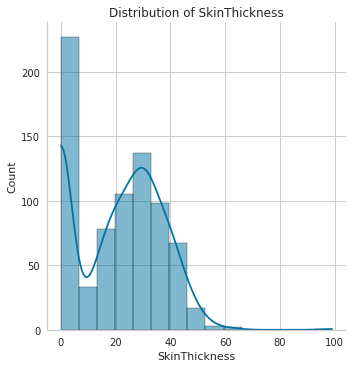

In [87]:
cont_dist(df,'SkinThickness')

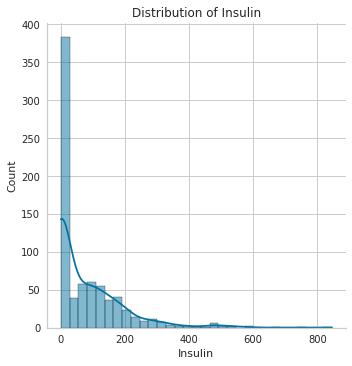

In [84]:
cont_dist(df,'Insulin')

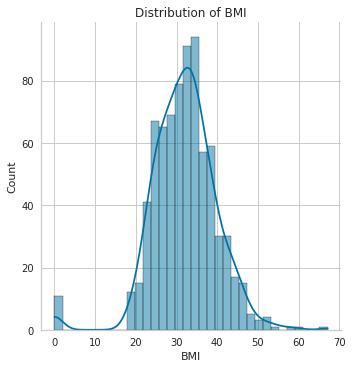

In [83]:
cont_dist(df,'BMI')

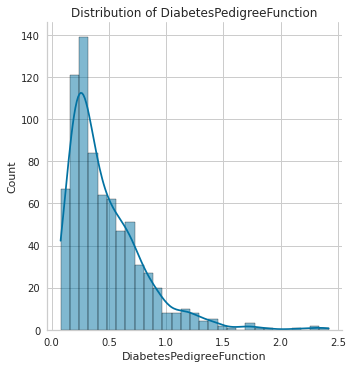

In [88]:
cont_dist(df,'DiabetesPedigreeFunction')

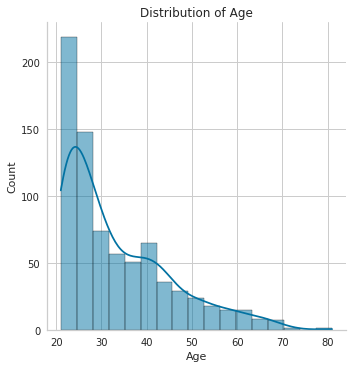

In [91]:
cont_dist(df,'Age')

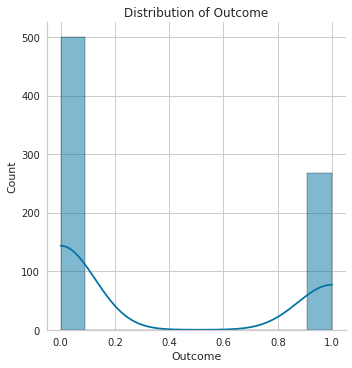

In [78]:
cont_dist(df,'Outcome')

There is Unbalance data. 1 indicate that the patient is Diabetic and 0 indicates that it i non diabetic

<AxesSubplot:ylabel='Outcome'>

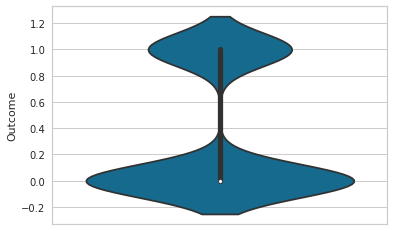

In [108]:
sns.violinplot(data=df, y='Outcome')

<AxesSubplot:ylabel='Pregnancies'>

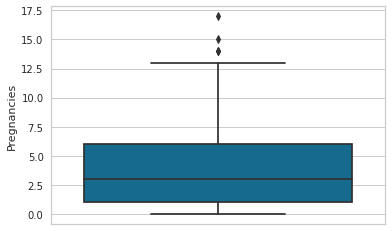

In [111]:
sns.boxplot(data=df, y='Pregnancies')

# Correlation

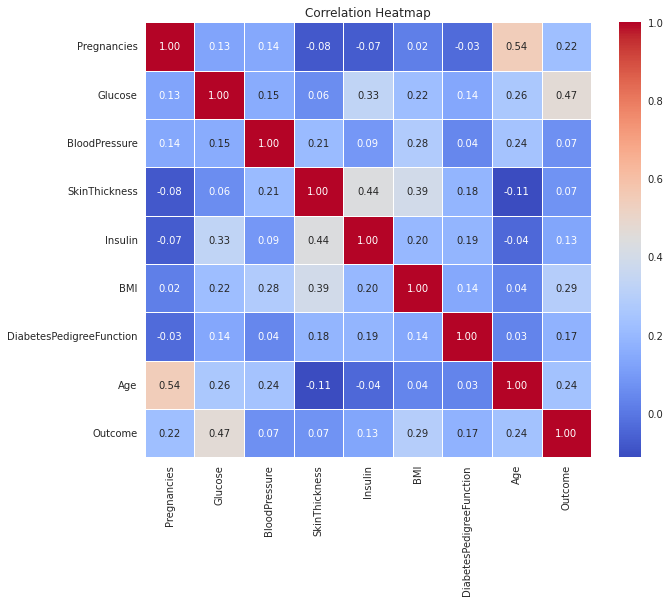

In [102]:
correlation=df.corr()
plt.figure(figsize=(10, 8))  # Set the figure size (adjust as needed)
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Data Preprocessing

In [143]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=123)
X_resampled, y_resampled = ros.fit_resample(X, y)

<AxesSubplot:>

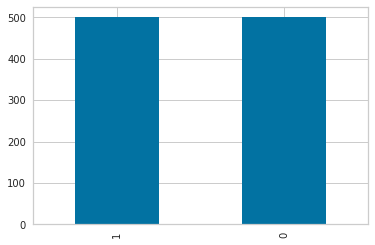

In [144]:
y_resampled.value_counts().plot(kind='bar')

In [158]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X_resampled)
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


In [159]:
df_2 = pd.concat([X, y_resampled], axis=1)
df_2.head()

,0,1,2,3,4,5,6,7,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1


In [160]:
df_2.columns = ['Pregnancies', 'Glucose', 'BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age', 'Outcome']
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1000 non-null   float64
 1   Glucose                   1000 non-null   float64
 2   BloodPressure             1000 non-null   float64
 3   SkinThickness             1000 non-null   float64
 4   Insulin                   1000 non-null   float64
 5   BMI                       1000 non-null   float64
 6   DiabetesPedigreeFunction  1000 non-null   float64
 7   Age                       1000 non-null   float64
 8   Outcome                   1000 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 70.4 KB


# Data Preprocessing While using Pycaret

In [163]:
clf = setup (data=df_2, target = 'Outcome', session_id=123,train_size= 0.8)

,Description,Value
0,Session id,123
1,Target,Outcome
2,Target type,Binary
3,Original data shape,"(1000, 9)"
4,Transformed data shape,"(1000, 9)"
5,Transformed train set shape,"(800, 9)"
6,Transformed test set shape,"(200, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


# Model Training

In [164]:
best= compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8462,0.9308,0.8525,0.8426,0.8467,0.6925,0.6938,0.4430
rf,Random Forest Classifier,0.8387,0.9214,0.8775,0.8158,0.8450,0.6775,0.6804,0.4620
catboost,CatBoost Classifier,0.8362,0.9008,0.8875,0.8053,0.8440,0.6725,0.6770,1.8910
lightgbm,Light Gradient Boosting Machine,0.8300,0.9006,0.8750,0.8041,0.8371,0.6600,0.6646,0.3520
xgboost,Extreme Gradient Boosting,0.8275,0.8992,0.8825,0.7978,0.8370,0.6550,0.6606,0.4100
dt,Decision Tree Classifier,0.7988,0.7988,0.8450,0.7736,0.8073,0.5975,0.6009,0.1930
gbc,Gradient Boosting Classifier,0.7962,0.8773,0.8350,0.7777,0.8040,0.5925,0.5965,0.3120
ada,Ada Boost Classifier,0.7738,0.8462,0.7750,0.7764,0.7742,0.5475,0.5498,0.2800
knn,K Neighbors Classifier,0.7463,0.8134,0.7750,0.7349,0.7529,0.4925,0.4954,0.2080
lr,Logistic Regression,0.7312,0.8169,0.7075,0.7461,0.7253,0.4625,0.4644,0.6390


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [165]:
print(best)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)


In [166]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9000,0.9500,0.8750,0.9211,0.8974,0.8000,0.8010
1,0.8500,0.9425,0.9000,0.8182,0.8571,0.7000,0.7035
2,0.8375,0.9466,0.8250,0.8462,0.8354,0.6750,0.6752
3,0.7750,0.8928,0.7750,0.7750,0.7750,0.5500,0.5500
4,0.8875,0.9647,0.9250,0.8605,0.8916,0.7750,0.7772
5,0.8000,0.8744,0.7500,0.8333,0.7895,0.6000,0.6030
6,0.8375,0.9456,0.8750,0.8140,0.8434,0.6750,0.6769
7,0.8375,0.9003,0.8250,0.8462,0.8354,0.6750,0.6752
8,0.8500,0.9441,0.8750,0.8333,0.8537,0.7000,0.7009


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

# Hyperparameter Tunning

In [173]:
# tune model sklearn
tune_model(et)

# tune model optuna
tune_model(et, search_library = 'optuna')

# tune model scikit-optimize
tune_model(et, search_library = 'scikit-optimize')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8500,0.9162,0.8250,0.8684,0.8462,0.7000,0.7009
1,0.7875,0.8700,0.8000,0.7805,0.7901,0.5750,0.5752
2,0.8000,0.9006,0.8000,0.8000,0.8000,0.6000,0.6000
3,0.7375,0.8138,0.7500,0.7317,0.7407,0.4750,0.4751
4,0.8500,0.8956,0.8000,0.8889,0.8421,0.7000,0.7035
5,0.7250,0.8225,0.7500,0.7143,0.7317,0.4500,0.4506
6,0.7750,0.8675,0.8500,0.7391,0.7907,0.5500,0.5563
7,0.8000,0.8675,0.8000,0.8000,0.8000,0.6000,0.6000
8,0.7500,0.8438,0.7750,0.7381,0.7561,0.5000,0.5006


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8875,0.9250,0.8750,0.8974,0.8861,0.7750,0.7752
1,0.8250,0.9069,0.8750,0.7955,0.8333,0.6500,0.6533
2,0.8000,0.9125,0.8250,0.7857,0.8049,0.6000,0.6008
3,0.7750,0.8281,0.8500,0.7391,0.7907,0.5500,0.5563
4,0.8375,0.9031,0.8000,0.8649,0.8312,0.6750,0.6769
5,0.7625,0.8362,0.7750,0.7561,0.7654,0.5250,0.5252
6,0.8125,0.8725,0.8500,0.7907,0.8193,0.6250,0.6268
7,0.7750,0.8681,0.8000,0.7619,0.7805,0.5500,0.5507
8,0.8000,0.8862,0.8750,0.7609,0.8140,0.6000,0.6069


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

[I 2023-07-22 18:45:10,612] Searching the best hyperparameters using 800 samples...
[I 2023-07-22 18:47:21,564] Finished hyperparemeter search!


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8625,0.9156,0.8250,0.8919,0.8571,0.7250,0.7270
1,0.8250,0.8844,0.9000,0.7826,0.8372,0.6500,0.6574
2,0.8500,0.9106,0.8500,0.8500,0.8500,0.7000,0.7000
3,0.7750,0.8375,0.8250,0.7500,0.7857,0.5500,0.5528
4,0.8750,0.9125,0.8750,0.8750,0.8750,0.7500,0.7500
5,0.7875,0.8375,0.8250,0.7674,0.7952,0.5750,0.5766
6,0.8125,0.8931,0.8500,0.7907,0.8193,0.6250,0.6268
7,0.8000,0.8838,0.7750,0.8158,0.7949,0.6000,0.6008
8,0.8000,0.8662,0.8500,0.7727,0.8095,0.6000,0.6030


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

Hyperparameter tunning suggests that the our original model is better in performance than tunned model. 

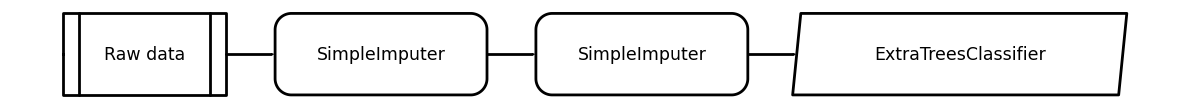

In [175]:
evaluate_model(et)

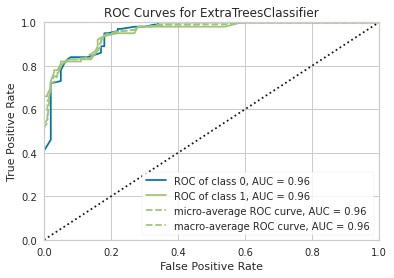

In [171]:
# plot model
plot_model(et, plot = 'auc')

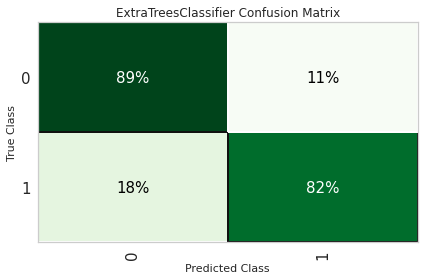

In [172]:
plot_model(et, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

# Coclusion

It is concluded from the availiable dataset we have found that the data is not normally distributed. Further, Dataset is quantitive in nature and outcome is imbalance. At the end, we run Machine Learning through using Pycaret,a low code Auto ML, which gives us model of ExtraTreesClassifier. The accuracy and precision of the model is 84% which is not bad. For further improvement, it is suggested that some more features like family histoty, physical activity and HBA1C shall be added. Finally, more data is required to improve the accuracy of the model.